# 📘 Principal Component Analysis (PCA) - Math

## 1. Data Centering

Let $X \in \mathbb{R}^{n \times d}$ be the data matrix with $n$ samples and $d$ features.

Mean of the data:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Centered data:

$$
X_{\text{centered}} = X - \mu
$$

---

## 2. Covariance Matrix

Covariance matrix:

$$
\Sigma = \frac{1}{n} X_{\text{centered}}^T X_{\text{centered}} \in \mathbb{R}^{d \times d}
$$

---

## 3. Eigen Decomposition

Solve:

$$
\Sigma v_i = \lambda_i v_i
$$

Where:
- $v_i$ is the $i$-th eigenvector (principal component)
- $\lambda_i$ is the corresponding eigenvalue

Sort eigenvalues:

$$
\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d
$$

---

## 4. Projection onto Principal Components

Select the top $k$ eigenvectors to form the projection matrix:

$$
W = [v_1 \; v_2 \; \dots \; v_k]
$$

Project the data:

$$
Z = X_{\text{centered}} W
$$

Where $Z \in \mathbb{R}^{n \times k}$ is the reduced data.

---

## 5. Reconstruction (Optional)

To reconstruct the original data:

$$
\hat{X} = Z W^T + \mu
$$


In [5]:
import numpy as np

class PCA():

  def __init__(self, n_components):
    self.n_components = n_components
    self.mean = None
    self.components = None

  def fit(self, X):
    self.mean = np.mean(X,axis=0)
    X = X - self.mean

    cov = np.cov(X.T)

    eigenvectors, eigenvalues = np.linalg.eig(cov)
    eigenvectors = eigenvectors.T

    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    self.components = eigenvectors[:self.n_components]


  def transform(self, X):
    X = X - self.mean

    return np.dot(X,self.components.T)

Shape of X: (150, 4)
Shape of X_projected: (150, 2)


/tmp/ipython-input-4229538049.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(x1,x0,c=y,edgecolor=None, alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))


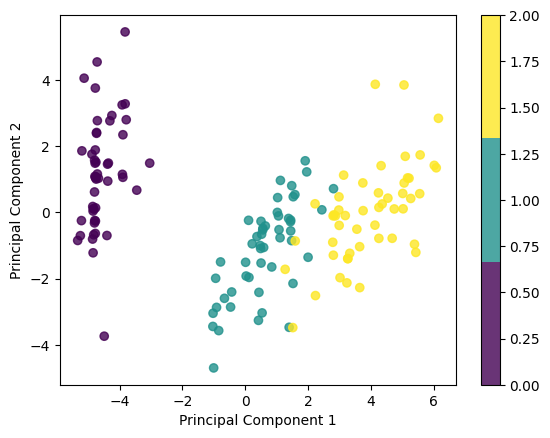

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X = data.data
y = data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print(f"Shape of X: {X.shape}")
print(f"Shape of X_projected: {X_projected.shape}")

x0 = X_projected[:,0]
x1 = X_projected[:,1]

plt.scatter(x1,x0,c=y,edgecolor=None, alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

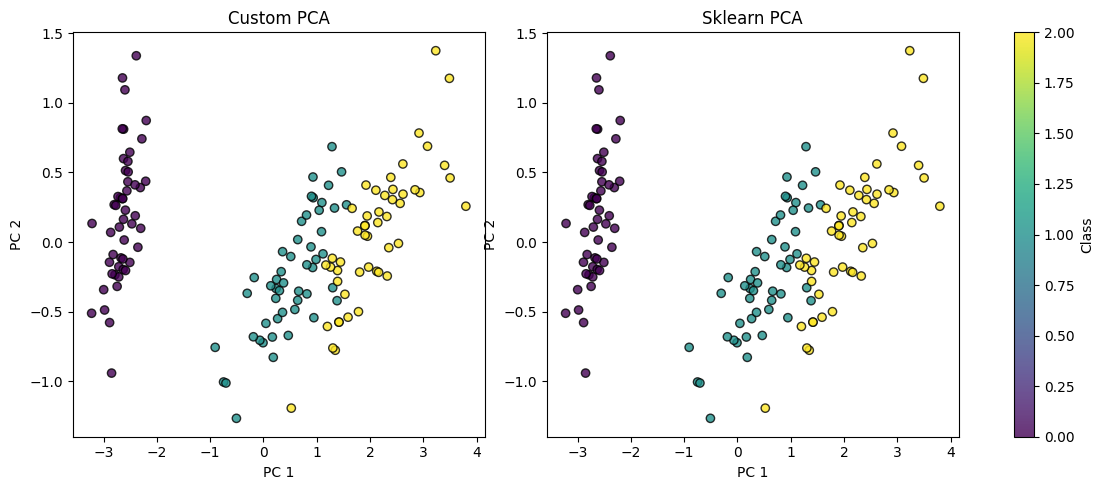

In [9]:
from sklearn.decomposition import PCA as SklearnPCA
custom_pca = PCA(n_components=2)
custom_pca.fit(X)
X_custom = custom_pca.transform(X)

# --- Sklearn PCA ---
sklearn_pca = SklearnPCA(n_components=2)
X_sklearn = sklearn_pca.fit_transform(X)

# --- Plot both side by side ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_custom[:, 0], X_custom[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
axs[0].set_title("Custom PCA")
axs[0].set_xlabel("PC 1")
axs[0].set_ylabel("PC 2")

axs[1].scatter(X_sklearn[:, 0], X_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
axs[1].set_title("Sklearn PCA")
axs[1].set_xlabel("PC 1")
axs[1].set_ylabel("PC 2")

plt.tight_layout()
plt.colorbar(axs[1].collections[0], ax=axs, location='right', label='Class')
plt.show()